# Experiments

In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import os
from data.load_data import load_monk, load_MLCup
from src.MetricFunctions import get_metric_instance
from src.MLP import MLP
from src.GridSearch import GridSearch, RandomGridsearch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from src.EarlyStopping import EarlyStopping
from src.BestModelSearch import BestModelSearch

## Task 1: Regression

Preparation: Loading MLCup Dataset

In [ ]:
path = os.getcwd()
file_train = '/data/ML-CUP22-TR.csv'
file_test = '/data/ML-CUP22-TS.csv'

labels_train = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','y1','y2']
labels_test = ['x1','x2','x3','x4','x5','x6','x7','x8','x9']

X_train, y_train = load_MLCup(path + file_train, labels_train)
X_test = load_MLCup(path + file_test, labels_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)


## Task 2: Classification

### Preparation: Loading Monk Datasets

In [18]:
path = os.getcwd()
file_train = '/data/monks-1.train'

labels = ['class','x1','x2','x3','x4','x5','x6']

TR_sets = [[]] 
TS_sets = [[]] 
for i in range(0,3):
    TR_sets.append(load_monk(path + f'/data/monks-{i + 1}.train', labels))
    TS_sets.append(load_monk(path + f'/data/monks-{i + 1}.test', labels))


[[1 0 0 ... 0 1 0]
 [1 0 0 ... 0 0 1]
 [1 0 0 ... 0 1 0]
 ...
 [0 0 1 ... 0 0 1]
 [0 0 1 ... 0 0 1]
 [0 0 1 ... 1 0 1]]


### Experiment 2.1 - Sigmoid Activation

**************************************
Monk Dataset 1

Accuracy on test set 1: 0.5

**************************************
Monk Dataset 2

Accuracy on test set 2: 0.3287037037037037

**************************************
Monk Dataset 3

Accuracy on test set 3: 0.5277777777777778



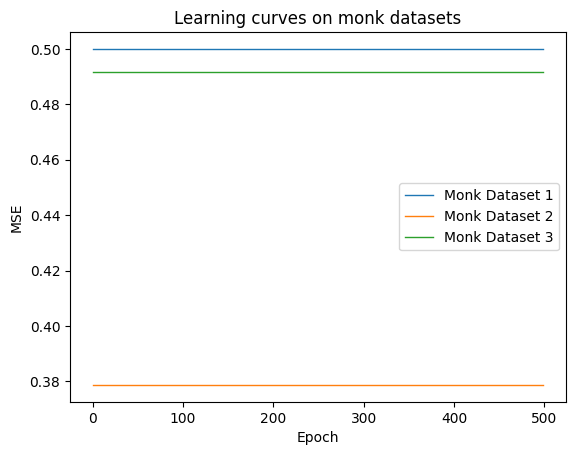

In [17]:
learning_curves = []

for i in range(1,4):

    print("**************************************")
    print(f"Monk Dataset {i}")
    input_size = TR_sets[i][0][0].shape[0]
    n_samples = TR_sets[i][0].shape[0]
    
    mlp = MLP([4], input_size = input_size, output_size = 1, task = "classification", activation_function = 'relu')

    mlp.fit(TR_sets[i][0], TR_sets[i][1], n_epochs = 500, batch_size = n_samples,\
        error = "mse", verbose = False, alpha_l2 = 1e-3, step = 0.001, weights_scale = 0.1)
        
    learning_curves.append(mlp.learning_curve)
    
    print()
    print(f"Accuracy on test set {i}: {mlp.evaluate_model(TS_sets[i][0], TS_sets[i][1])}")
    print()

fig, ax = plt.subplots()

j = 1
for learning_curve in learning_curves:
    ax.plot(range(0, len(learning_curve), 1), learning_curve, linewidth = 1, label =f'Monk Dataset {j}')
    j += 1


ax.set_xlabel('Epoch')  
ax.set_ylabel('MSE')  
ax.set_title("Learning curves on monk datasets")  
ax.legend()

In [ ]:
fig, ax = plt.subplots()
learning_curves = []

for i in range(1,4):
    
    n_samples = TR_sets[i][0].shape[0]
    
    grid_parameters = {'n_epochs': [500, 1000],
        'batch_size': [n_samples], 
        'step': [1e-4, 1e-3, 1e-2, 1e-1],
        'momentum' : [0.5, 0.75],
        'error' : ["mse"],
        'verbose' : [False],
        'Nesterov' : [True, False],
        'regularization' : ['l2'],
        'alpha_l1' : [0],
        'alpha_l2' : [1e-1, 1e-2, 1e-3, 1e-7],
        }

    print("**************************************")
    print(f"Monk Dataset {i}")

    input_size = TR_sets[i][0][0].shape[0]
    mlp = MLP([4], input_size = input_size, output_size = 1, task = "classification", activation_function = 'tanh')

    model_search = BestModelSearch(mlp)
    model_search.fit(X_train = TR_sets[i][0], y_train = TR_sets[i][1], X_test = TS_sets[i][0], y_test = TS_sets[i][1], parameters_grid = grid_parameters, verbose = False, parallel = False)

    best_model = model_search.best_model
    learning_curves.append(best_model.learning_curve)

    print()
    print(f"Accuracy on test set {i}: {best_model.evaluate_model(TS_sets[i][0], TS_sets[i][1])}")
    print("Reached with parameters: ", model_search.get_best_parameters())
    print()

j = 1
for learning_curve in learning_curves:
    ax.plot(range(0, len(learning_curve), 1), learning_curve, linewidth = 1, label =f'Monk Dataset {j}')
    j += 1


ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_title("Learning curves on monk datasets")